In [1]:
import pathlib as pl
import pickle as pkl
import pandas as pd

In [2]:
data = []
for path in pl.Path('<path to your evaluation results>').glob('**/*_metrics.pkl'):
    print(path)
    with open(path, 'rb') as f:
        metrics = pkl.load(f)
    parts = path.parts
    set_ = parts[-1].split('_')[0]
    session = parts[-2]
    subject = parts[-3]
    trial = parts[-7]
    seed = parts[-5]
    run = parts[-6]
    metrics.update(session=session, subject=subject, trial=trial, seed=seed, run=run, set=set_)
    data.append(metrics)
data = pd.DataFrame(data)
data = data.set_index([
    'trial', 'session', 'subject', 'set'
])
valid = data.xs('valid', level='set')
test = data.xs('test', level='set')
data = valid.join(test, lsuffix='_valid', rsuffix='_test')
data[['acc_valid', 'acc_test']].groupby('trial').describe().sort_values(('acc_valid', 'mean'))

acc_valid                                                           \
              count      mean       std       min       25%       50%    75%   
trial                                                                          
hopt_full    1800.0  0.802778  0.100142  0.553571  0.732143  0.821429  0.875   

                    acc_test                                          \
                max    count      mean       std       min       25%   
trial                                                                  
hopt_full  0.964286   1800.0  0.732485  0.097915  0.541667  0.635417   

                                       
                50%     75%       max  
trial                                  
hopt_full  0.743056  0.8125  0.916667

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.5, 1.0)

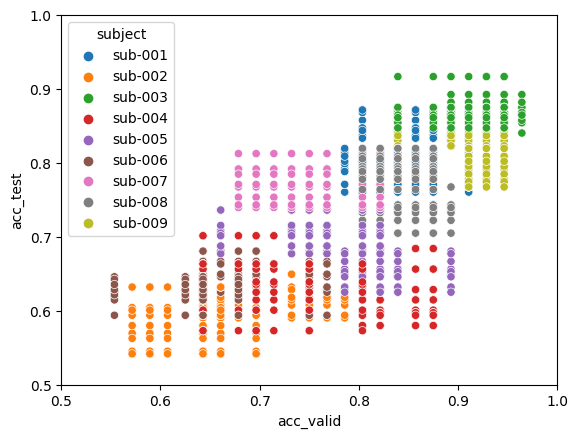

In [9]:
sns.scatterplot(data, x='acc_valid', y='acc_test', hue='subject')
plt.xlim(0.5, 1.0); plt.ylim(0.5, 1.0)